# **Detection of Pneumonia by classification of X-ray images using CNN and Transfer Learning**

## VGG16 is used for transfer learning

Reproduce the trained layers till the 7*7*512 max pooling layer and add our layers of the model

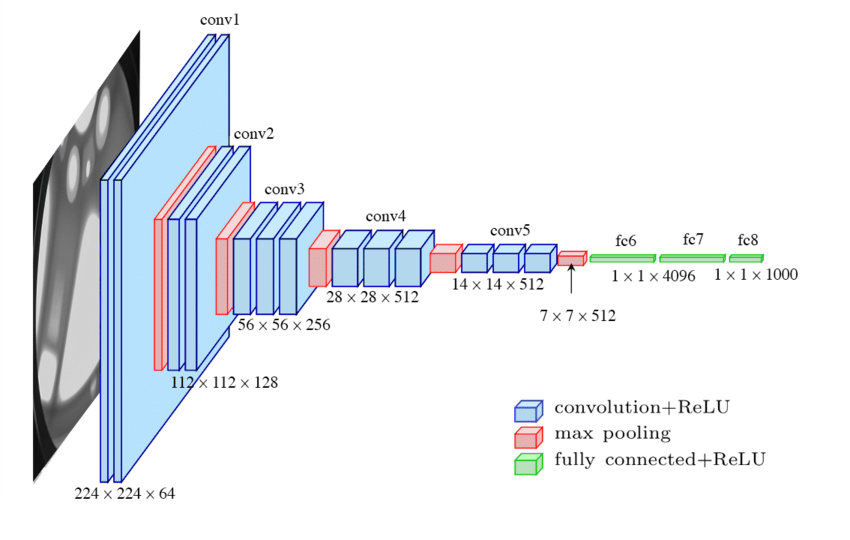

**Tesla T4**

In [46]:
!nvidia-smi

Sun Jun 20 05:18:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [47]:
!pip install tensorflow-gpu

In [48]:
pip install scipy==1.1.0

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread

In [50]:
train_image_gen = ImageDataGenerator(rescale=1./255)
val_image_gen = ImageDataGenerator(rescale=1./255)

In [51]:
train_set = train_image_gen.flow_from_directory('/content/drive/MyDrive/Program/CNN/Dataset/xray_dataset_covid19/train',target_size=(224,224))

Found 148 images belonging to 2 classes.


In [52]:
val_set = val_image_gen.flow_from_directory('/content/drive/MyDrive/Program/CNN/Dataset/xray_dataset_covid19/test',target_size=(224,224))

Found 40 images belonging to 2 classes.


**VGG16** (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it. 

The default input size for VGG16 model is **224x224**.

In [53]:
pre_net = VGG16(include_top=False,weights='imagenet',input_shape=[224,224,3],classifier_activation='softmax')

We won't change the weights inside the vgg16 layers


In [54]:
# for layer in pre_net.layers:
#     layer.trainable = False

# model = Model(inputs=pre_net.input)
# model.add(Flatten())
# model.add(Dense(2,activation='softmax'))
# model.summary()

In [55]:
for layer in pre_net.layers:
    layer.trainable = False

logit = Flatten()(pre_net.output)
pred = Dense(2,activation='softmax')(logit)
model = Model(inputs=pre_net.input,outputs=pred)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [56]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

In [57]:
model.compile(loss=loss,optimizer=optimizer,metrics=metrics)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


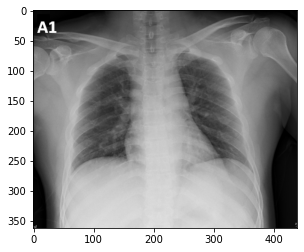

In [58]:
train_img_path = '/content/drive/MyDrive/Program/CNN/Dataset/xray_dataset_covid19/train/PNEUMONIA/1-s2.0-S1684118220300682-main.pdf-002-a1.png'
train_img_pneumonia = imread(train_img_path)
plt.imshow(train_img_pneumonia)

In [59]:
epoch_step = len(train_set)
val_step = len(val_set)

In [60]:
result = model.fit_generator(train_set,validation_data=val_set,epochs=5,steps_per_epoch=epoch_step,validation_steps=val_step)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
5/5 [==============================] - 86s 17s/step - loss: 1.2893 - accuracy: 0.5338 - val_loss: 1.1962 - val_accuracy: 0.5000
Epoch 2/5
5/5 [==============================] - 84s 18s/step - loss: 0.4311 - accuracy: 0.8108 - val_loss: 0.2058 - val_accuracy: 0.9250
Epoch 3/5
5/5 [==============================] - 83s 17s/step - loss: 0.2733 - accuracy: 0.9054 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 83s 18s/step - loss: 0.0868 - accuracy: 0.9662 - val_loss: 0.2565 - val_accuracy: 0.8500
Epoch 5/5
5/5 [==============================] - 83s 17s/step - loss: 0.0912 - accuracy: 0.9662 - val_loss: 0.0606 - val_accuracy: 0.9750


### **Plot of Training and Validation loss**

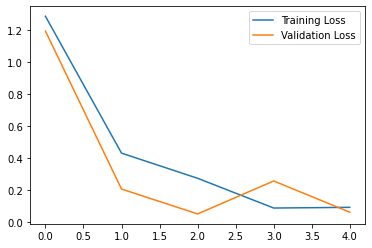

In [61]:
plt.plot(result.history['loss'],label ='Training Loss')
plt.plot(result.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

### **Plot of Training and Validation accuracy**

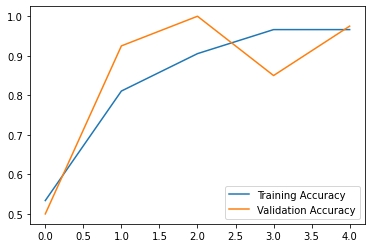

In [62]:
plt.plot(result.history['accuracy'], label = 'Training Accuracy')
plt.plot(result.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## **Accuracy**

In [72]:
accuracy = list(result.history['accuracy'])[-1]*100
print("Training Accuracy of the given model is: %.4f%%" %accuracy)

Training Accuracy of the given model is: 96.6216%
